In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from database import DatabaseUtils
from CNN.formatting import Filters
import sys

In [2]:
EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),(0.833, 'black'),(0.87, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

In [3]:
spa = 1
BoxesPath = "/amphora/bradley.greig/21CMMC_wTs_LC_RSDs_Nicolas/Programs/LightConeBoxes"
ParametersPath = "/amphora/bradley.greig/21CMMC_wTs_LC_RSDs_Nicolas/Programs/GridPositions"
Redshifts = ['006.00060', '006.75589', '007.63960', '008.68274', '009.92624', '011.42503', \
            '013.25424', '015.51874', '018.36856', '022.02434', '026.82138', '033.28927', '034.50984']
Parameters = ["ZETA", "TVIR_MIN", "L_X", "NU_X_THRESH"]
DataFilepath = "../data/"

In [4]:
database = DatabaseUtils.Database(Parameters, Redshifts, BoxesPath, ParametersPath)

# Testing data creation on nefertem

In [15]:
DataX = database.CreateSlicedData(SlicesPerAxis = spa, walkers = range(10))
DataY = database.CreateParamData(walkers = range(10))
print(DataX.shape)
print(DataY.shape)
print(DataY)

0
0
(10, 2, 200, 2232)
(10, 4)
[[ 154.6127      5.269268   40.394787 1476.8921  ]
 [ 247.17285     4.798097   40.06002   559.90265 ]
 [ 192.50664     5.267022   40.82196   717.4615  ]
 [ 116.974014    5.391377   41.70435   358.9669  ]
 [ 120.01934     4.572051   41.701393  476.09567 ]
 [  86.3317      5.19834    41.703217  274.87207 ]
 [  69.58807     4.37589    38.238113  765.95123 ]
 [ 127.56723     4.100537   40.4937    869.2299  ]
 [ 148.24672     4.150671   39.427853  607.7867  ]
 [ 102.21335     4.85294    38.98569   566.8359  ]]


[ 154.6127      5.269268   40.394787 1476.8921  ]


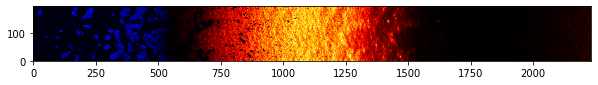

[247.17285    4.798097  40.06002  559.90265 ]


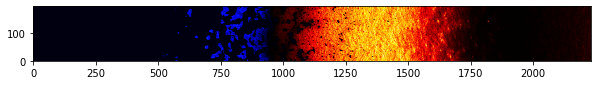

[192.50664    5.267022  40.82196  717.4615  ]


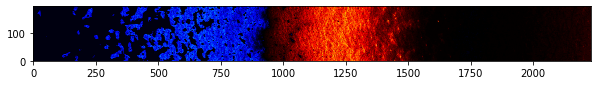

[116.974014   5.391377  41.70435  358.9669  ]


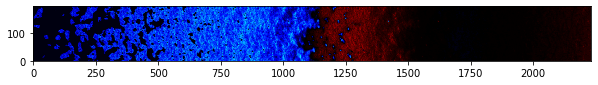

[120.01934    4.572051  41.701393 476.09567 ]


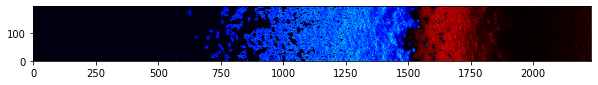

[ 86.3317     5.19834   41.703217 274.87207 ]


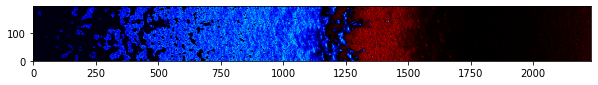

[ 69.58807    4.37589   38.238113 765.95123 ]


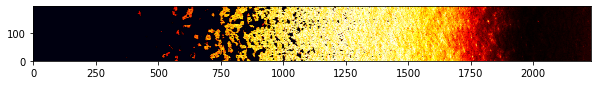

[127.56723    4.100537  40.4937   869.2299  ]


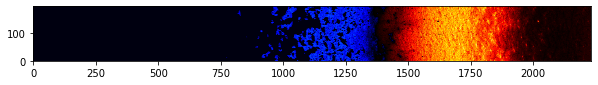

[148.24672    4.150671  39.427853 607.7867  ]


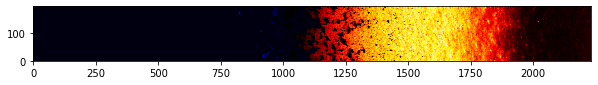

[102.21335   4.85294  38.98569 566.8359 ]


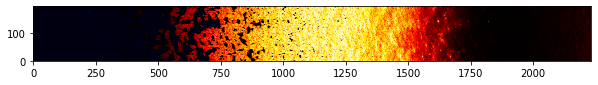

In [10]:
# fig=plt.figure(figsize=(10, 20))
for i in range(10):
    print(DataY[i])
    for j in range(1):
        fig=plt.figure(figsize=(10, 1))
        plt.pcolormesh(DataX[i, j], vmin = -250, vmax = 50, cmap=EoR_colour,shading='gouraud')
        plt.show()

In [16]:
deltaTmin = -250
deltaTmax = 50
tophat = [2, 2]
Zmax = 30

In [17]:
Ybackup = {}
Ybackup['parameters'] = database.Parameters
DataY, Ybackup['min'], Ybackup['max'] = Filters.NormalizeY(DataY)
Ybackup['min'] = Ybackup['min'].tolist()
Ybackup['max'] = Ybackup['max'].tolist()

In [18]:
print(DataY)
print(Ybackup)

[[0.4787833  0.9054035  0.6221946  1.        ]
 [1.         0.54039246 0.5256154  0.23712632]
 [0.69216835 0.90366364 0.7454331  0.36820468]
 [0.2668356  1.         1.         0.06996124]
 [0.28398418 0.365277   0.9991471  0.16740453]
 [0.09428527 0.8504563  0.9996731  0.        ]
 [0.         0.21331298 0.         0.4085449 ]
 [0.32648718 0.         0.65073025 0.49446586]
 [0.44293573 0.03883841 0.34323663 0.2769626 ]
 [0.18371661 0.5828787  0.21567419 0.24289429]]
{'parameters': ['ZETA', 'TVIR_MIN', 'L_X', 'NU_X_THRESH'], 'min': [69.58807373046875, 4.100536823272705, 38.23811340332031, 274.8720703125], 'max': [247.1728515625, 5.391376972198486, 41.704349517822266, 1476.89208984375]}


In [19]:
DataX = Filters.RemoveLargeZ(DataX, database, Z=Zmax)
print(f"Remove large Z {DataX.shape}")
DataX = Filters.CutInX(DataX, N=2)
print(f"Cut x-dim in half {DataX.shape}")

Remove large Z (10, 2, 200, 2107)
Cut x-dim in half (10, 4, 100, 2107)


In [14]:
np.nan_to_num(DataX, copy=False, nan=deltaTmin, posinf=deltaTmax, neginf=deltaTmin)
print(f"NaN's and infinities set to {deltaTmin}, {deltaTmax}")
np.clip(DataX, deltaTmin, deltaTmax, out=DataX)
print("large values clipped")

NaN's and infinities set to -250, 50
large values clipped


In [12]:
DataX = Filters.TopHat(DataX, Nx = tophat[0], Nz = tophat[1])
# AverageX = Filters.TopHat(AverageX, Nx = 1, Nz = tophat[1])
print(f"Top Hat 2, 2 {DataX.shape}")

Top Hat 2, 2 (10, 4, 50, 534)


In [13]:
DataX = (DataX - deltaTmin) / (deltaTmax - deltaTmin)
print("X normalized")

X normalized


[0.4787833 0.9054035 0.6221946 1.       ]


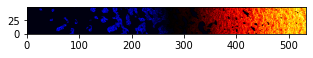

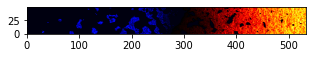

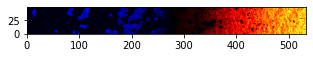

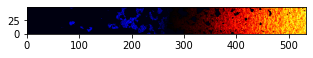

[1.         0.54039246 0.5256154  0.23712632]


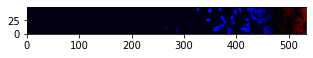

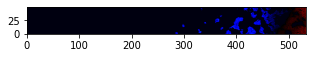

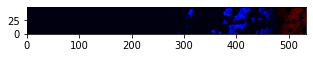

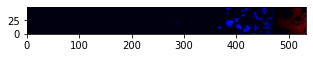

[0.69216835 0.90366364 0.7454331  0.36820468]


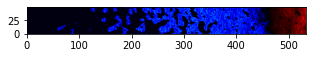

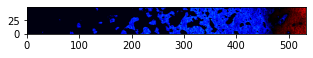

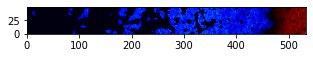

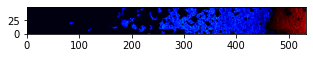

[0.2668356  1.         1.         0.06996124]


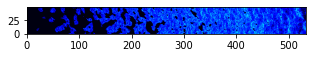

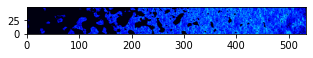

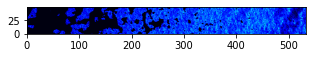

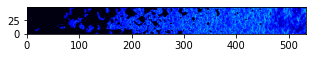

[0.28398418 0.365277   0.9991471  0.16740453]


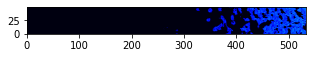

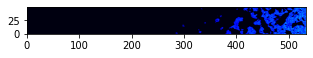

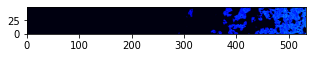

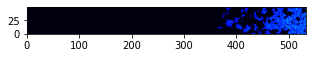

[0.09428527 0.8504563  0.9996731  0.        ]


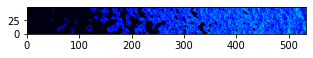

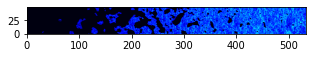

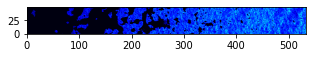

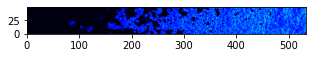

[0.         0.21331298 0.         0.4085449 ]


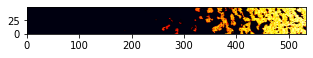

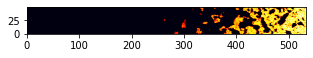

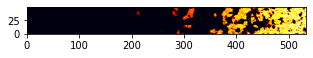

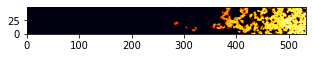

[0.32648718 0.         0.65073025 0.49446586]


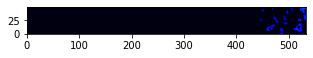

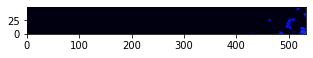

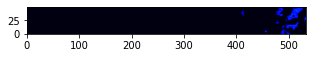

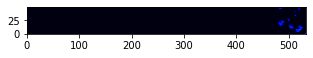

[0.44293573 0.03883841 0.34323663 0.2769626 ]


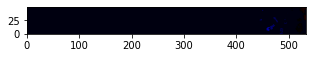

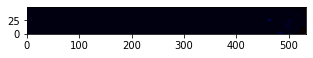

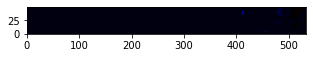

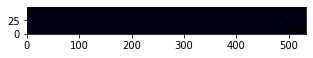

[0.18371661 0.5828787  0.21567419 0.24289429]


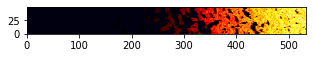

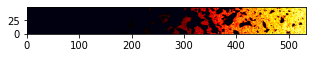

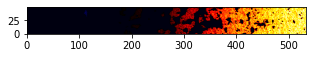

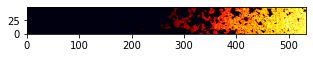

In [14]:
# fig=plt.figure(figsize=(10, 20))
for i in range(10):
    print(DataY[i])
    for j in range(4):
        fig=plt.figure(figsize=(5, 0.5))
        plt.pcolormesh(DataX[i, j], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
        plt.show()

In [15]:
pTrain = 0.6
pDev = 0.2
pTest = 0.2
trainX, trainY, trainWI, devX, devY, devWI, testX, testY, testWI = Filters.TDT(DataX, DataY, pTrain, pDev, pTest, WalkerSteps=10)

print(trainX.shape)
print(trainY.shape)
print(trainWI.shape)
print(devX.shape)
print(devY.shape)
print(devWI.shape)
print(testX.shape)
print(testY.shape)
print(testWI.shape)

[0 0 0 0 0 0 1 1 2 2]
[2 0 1 0 1 0 0 2 0 0]
(24, 50, 534)
(24, 4)
(24, 2)
(8, 50, 534)
(8, 4)
(8, 2)
(8, 50, 534)
(8, 4)
(8, 2)


[0.4787833 0.9054035 0.6221946 1.       ] [1 3]


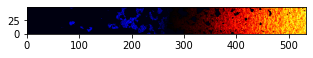

[0.32648718 0.         0.65073025 0.49446586] [8 1]


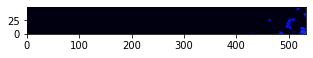

[0.4787833 0.9054035 0.6221946 1.       ] [1 0]


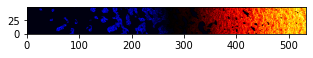

[0.4787833 0.9054035 0.6221946 1.       ] [1 2]


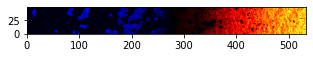

[0.4787833 0.9054035 0.6221946 1.       ] [1 1]


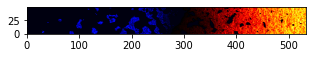

[0.32648718 0.         0.65073025 0.49446586] [8 0]


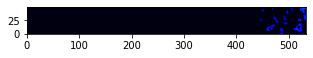

[0.32648718 0.         0.65073025 0.49446586] [8 2]


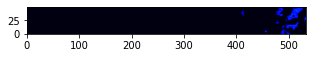

[0.32648718 0.         0.65073025 0.49446586] [8 3]


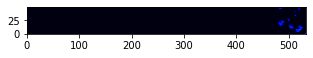

In [16]:
for i in range(8):
    fig=plt.figure(figsize=(5, 0.5))
    print(testY[i], testWI[i])
    plt.pcolormesh(testX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

In [ ]:
for i in range(8):
    fig=plt.figure(figsize=(5, 0.5))
    print(devY[i], devWI[i])
    plt.pcolormesh(devX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

[1.         0.27589276 0.         0.1797399 ]


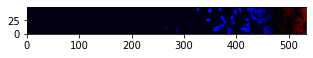

[0. 1. 1. 0.]


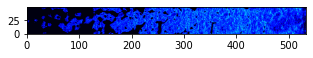

[0. 1. 1. 0.]


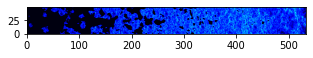

[0. 1. 1. 0.]


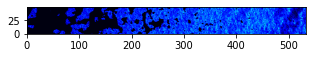

[1.         0.27589276 0.         0.1797399 ]


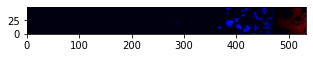

[0.2890862  0.8509641  0.20358844 1.        ]


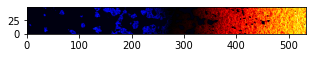

[0. 1. 1. 0.]


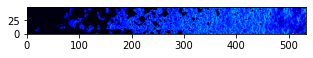

[1.         0.27589276 0.         0.1797399 ]


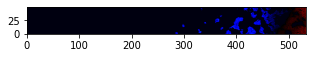

[0. 1. 1. 0.]


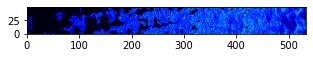

[0.2890862  0.8509641  0.20358844 1.        ]


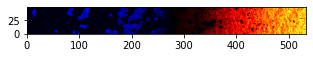

[0.2890862  0.8509641  0.20358844 1.        ]


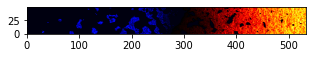

[0. 1. 1. 0.]


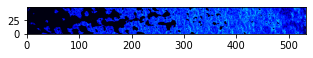

[0.2890862  0.8509641  0.20358844 1.        ]


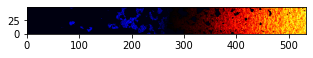

[0. 1. 1. 0.]


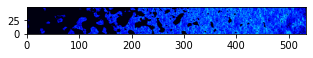

[1.         0.27589276 0.         0.1797399 ]


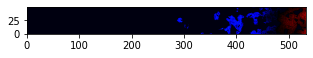

[0.2890862  0.8509641  0.20358844 1.        ]


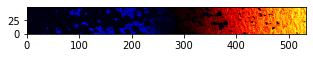

[1.         0.27589276 0.         0.1797399 ]


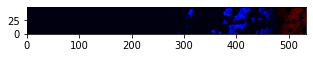

[0.2890862  0.8509641  0.20358844 1.        ]


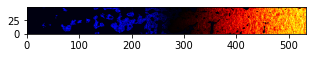

[0. 1. 1. 0.]


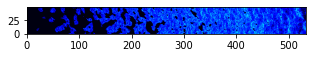

[0.2890862  0.8509641  0.20358844 1.        ]


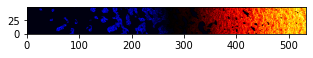

[1.         0.27589276 0.         0.1797399 ]


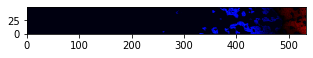

[0.2890862  0.8509641  0.20358844 1.        ]


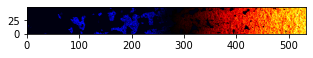

[1.         0.27589276 0.         0.1797399 ]


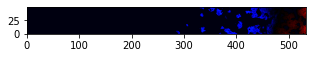

[1.         0.27589276 0.         0.1797399 ]


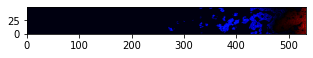

In [23]:
for i in range(24):
    fig=plt.figure(figsize=(5, 0.5))
    print(trainY[i], trainWI[i])
    plt.pcolormesh(trainX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

# Test thanatos data

In [5]:
trainX = np.load(DataFilepath + 'train/X_'+"0.8_tophat22_Z12_database5_float32.npy")
trainY = np.load(DataFilepath + 'train/Y_'+"0.8_tophat22_Z12_database5_float32.npy")

In [7]:
trainWI = np.load(DataFilepath + 'train/X_'+"0.8_WalkerIndex.npy")

[0.9875833  0.53402555 0.85890263 0.8094157 ] [1927   11]


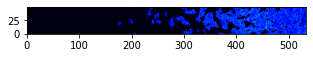

[0.9434359  0.41395104 0.6653883  0.74104846] [8385   13]


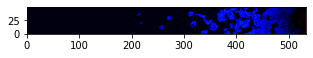

[0.9572825  0.45806098 0.9017883  0.10076753] [2603   15]


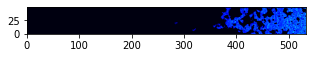

[0.56891835 0.0475856  0.8030424  0.04958445] [9510    9]


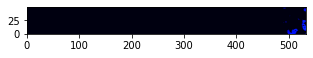

[0.17246498 0.8723928  0.31790882 0.2609041 ] [2663    9]


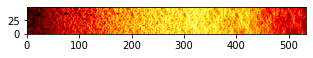

[0.32742634 0.5411255  0.03466678 0.71366274] [8595    3]


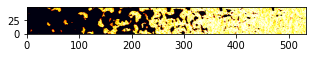

[0.6668901 0.5255789 0.3259932 0.5778415] [9583   19]


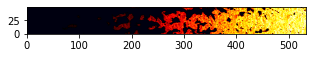

[0.645756   0.61606306 0.68649584 0.5192161 ] [2784    8]


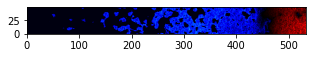

[0.11954755 0.16165307 0.31624633 0.43300217] [6001   15]


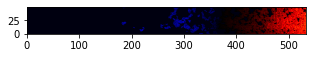

[0.06991953 0.55427307 0.21457995 0.76790464] [6761    6]


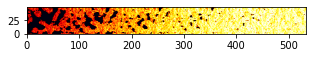

In [7]:
#thanatos
for i in range(10):
    fig=plt.figure(figsize=(5, 0.5))
    print(trainY[i], trainWI[i])
    plt.pcolormesh(trainX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

In [5]:
trainX = np.load(DataFilepath + 'train/X_'+"0.8_tophat22_Z30_meanZ_database5_float32.npy")
trainY = np.load(DataFilepath + 'train/Y_'+"0.8_tophat22_Z30_meanZ_database5_float32.npy")

[0.9875833  0.53402555 0.85890263 0.8094157 ] [1927   11]


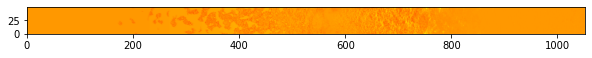

[0.9434359  0.41395104 0.6653883  0.74104846] [8385   13]


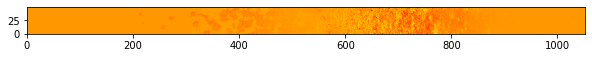

[0.9572825  0.45806098 0.9017883  0.10076753] [2603   15]


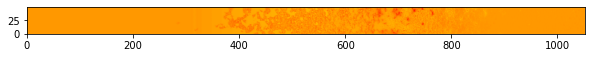

[0.56891835 0.0475856  0.8030424  0.04958445] [9510    9]


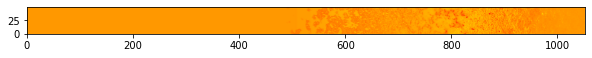

[0.17246498 0.8723928  0.31790882 0.2609041 ] [2663    9]


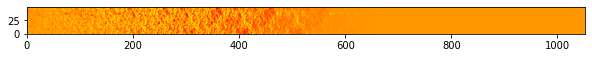

[0.32742634 0.5411255  0.03466678 0.71366274] [8595    3]


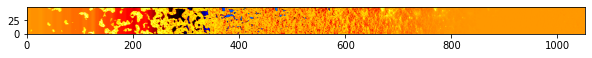

[0.6668901 0.5255789 0.3259932 0.5778415] [9583   19]


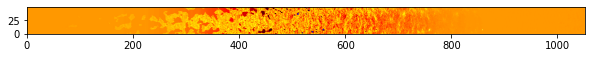

[0.645756   0.61606306 0.68649584 0.5192161 ] [2784    8]


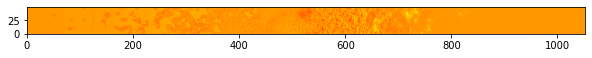

[0.11954755 0.16165307 0.31624633 0.43300217] [6001   15]


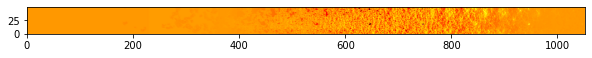

[0.06991953 0.55427307 0.21457995 0.76790464] [6761    6]


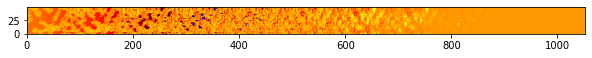

In [9]:
for i in range(10):
    fig=plt.figure(figsize=(10, 0.5))
    print(trainY[i], trainWI[i])
    plt.pcolormesh(trainX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

In [5]:
trainX = np.load(DataFilepath + 'train/X_'+"0.8_tophat22_Z30_database5_float32.npy")
trainY = np.load(DataFilepath + 'train/Y_'+"0.8_tophat22_Z30_database5_float32.npy")

[0.9875833  0.53402555 0.85890263 0.8094157 ] [1927   11]


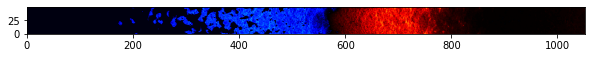

[0.9434359  0.41395104 0.6653883  0.74104846] [8385   13]


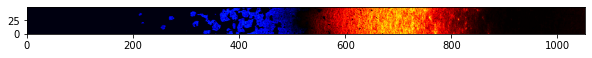

[0.9572825  0.45806098 0.9017883  0.10076753] [2603   15]


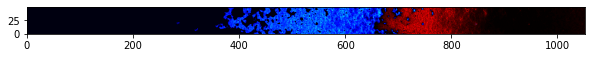

[0.56891835 0.0475856  0.8030424  0.04958445] [9510    9]


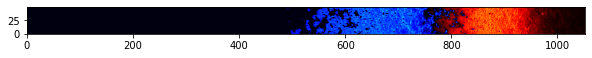

[0.17246498 0.8723928  0.31790882 0.2609041 ] [2663    9]


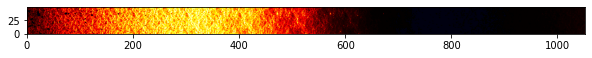

[0.32742634 0.5411255  0.03466678 0.71366274] [8595    3]


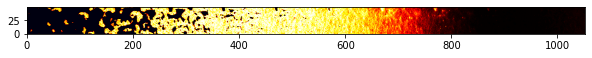

[0.6668901 0.5255789 0.3259932 0.5778415] [9583   19]


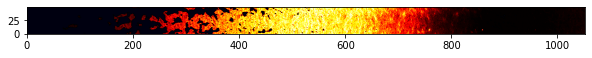

[0.645756   0.61606306 0.68649584 0.5192161 ] [2784    8]


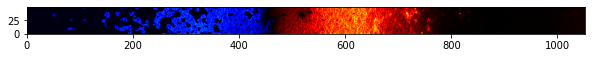

[0.11954755 0.16165307 0.31624633 0.43300217] [6001   15]


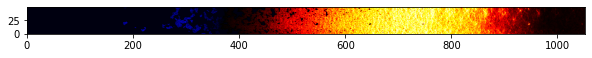

[0.06991953 0.55427307 0.21457995 0.76790464] [6761    6]


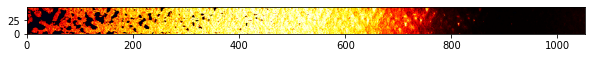

In [8]:
for i in range(10):
    fig=plt.figure(figsize=(10, 0.5))
    print(trainY[i], trainWI[i])
    plt.pcolormesh(trainX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

[0.9875833  0.53402555 0.85890263 0.8094157 ] [1927   11]


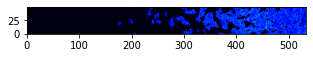

[0.9434359  0.41395104 0.6653883  0.74104846] [8385   13]


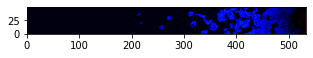

[0.9572825  0.45806098 0.9017883  0.10076753] [2603   15]


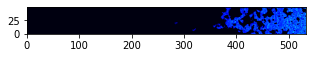

[0.56891835 0.0475856  0.8030424  0.04958445] [9510    9]


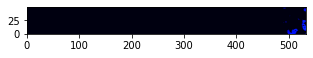

[0.17246498 0.8723928  0.31790882 0.2609041 ] [2663    9]


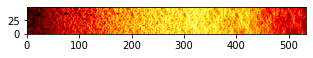

[0.32742634 0.5411255  0.03466678 0.71366274] [8595    3]


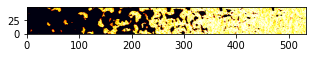

[0.6668901 0.5255789 0.3259932 0.5778415] [9583   19]


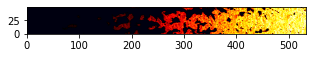

[0.645756   0.61606306 0.68649584 0.5192161 ] [2784    8]


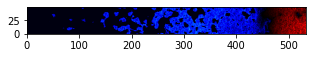

[0.11954755 0.16165307 0.31624633 0.43300217] [6001   15]


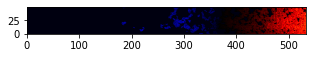

[0.06991953 0.55427307 0.21457995 0.76790464] [6761    6]


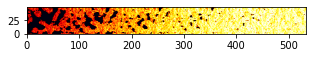

In [7]:
#nefertem
for i in range(10):
    fig=plt.figure(figsize=(5, 0.5))
    print(trainY[i], trainWI[i])
    plt.pcolormesh(trainX[i], vmin = 0, vmax = 1, cmap=EoR_colour,shading='gouraud')
    plt.show()

In [10]:
trainWI.shape

(160000, 2)

In [11]:
#nefertem from database
walkers = trainWI[:10, 0]
print(walkers)
DataX = database.CreateSlicedData(SlicesPerAxis = 5, walkers = walkers)
DataY = database.CreateParamData(walkers = walkers)
print(DataX.shape)
print(DataY.shape)
print(DataY)

[1927 8385 2603 9510 2663 8595 9583 2784 6001 6761]
(10, 10, 200, 2232)
(10, 4)
[[ 246.97531     5.067557   41.43558  1232.6978  ]
 [ 236.38295     4.827555   40.661625 1137.0355  ]
 [ 239.70518     4.915721   41.6071    241.12831 ]
 [ 146.52443     4.095274   41.21217   169.51085 ]
 [  51.40283     5.743876   39.27189   465.19797 ]
 [  88.582924    5.081748   38.13907  1098.7163  ]
 [ 170.03094     5.050674   39.304222  908.66974 ]
 [ 164.96019     5.231531   40.746044  826.6386  ]
 [  38.706276    4.323269   39.26524   706.0046  ]
 [  26.798954    5.108027   38.858627 1174.6138  ]]


[ 246.97531     5.067557   41.43558  1232.6978  ] [1927   11] [ 246.97531     5.067557   41.43558  1232.6978  ]


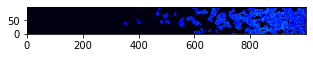

[ 236.38295     4.827555   40.661625 1137.0355  ] [8385   13] [ 236.38295     4.827555   40.661625 1137.0355  ]


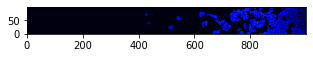

[239.70518    4.915721  41.6071   241.12831 ] [2603   15] [239.70518    4.915721  41.6071   241.12831 ]


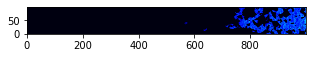

[146.52443    4.095274  41.21217  169.51085 ] [9510    9] [146.52443    4.095274  41.21217  169.51085 ]


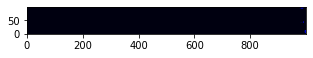

[ 51.40283    5.743876  39.27189  465.19797 ] [2663    9] [ 51.40283    5.743876  39.27189  465.19797 ]


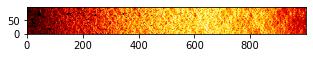

[  88.582924    5.081748   38.13907  1098.7163  ] [8595    3] [  88.582924    5.081748   38.13907  1098.7163  ]


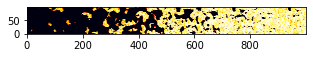

[170.03094    5.050674  39.304222 908.66974 ] [9583   19] [170.03094    5.050674  39.304222 908.66974 ]


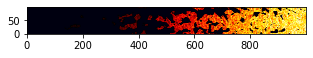

[164.96019    5.231531  40.746044 826.6386  ] [2784    8] [164.96019    5.231531  40.746044 826.6386  ]


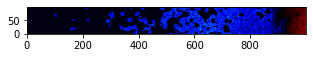

[ 38.706276   4.323269  39.26524  706.0046  ] [6001   15] [ 38.706276   4.323269  39.26524  706.0046  ]


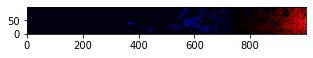

[  26.798954    5.108027   38.858627 1174.6138  ] [6761    6] [  26.798954    5.108027   38.858627 1174.6138  ]


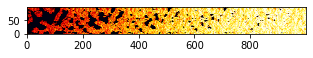

In [13]:
for i in range(10):
    fig=plt.figure(figsize=(5, 0.5))
    WI = trainWI[i]
    WalkerAstroParams = database.WalkerAstroParams(WI[0], ReturnType="array")
    normWalkerAstroParams, _, _ = Filters.NormalizeY(WalkerAstroParams)
    print(WalkerAstroParams, WI, DataY[i])
    Box = database.CombineBoxes(WI[0], 5)
    slices = database.SliceBoxNTimesXY(Box, 5)
    slices = Filters.CutInX(slices)
    # print(slices.shape)
    plt.pcolormesh(slices[WI[1]], vmin = -250, vmax = 50, cmap=EoR_colour,shading='gouraud')
    plt.show()
    # plt.imshow(DataX[images*i//10], cmap="gray")